In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [84]:
file = '../data/features.csv'
df = pd.read_csv(file)
print(df.columns)
features = df[['runtime_difference_from_average',
       'content_rating', 'original_release_date', 'streaming_release_date',
       'original_release_quarter', 'streaming_release_quarter',
       'original_release_month', 'streaming_release_month',
       'tomatometer_status', 'audience_status', 'genres_sums',
       'prodComp_sums', 'title_length', 'critic_consensus_length',
       'directors_counts', 'actors_counts', 'actors_value', 'directors_value']]

Index(['rotten_tomatoes_link', 'movie_title', 'movie_info', 'runtime',
       'runtime_difference_from_average', 'critics_consensus',
       'content_rating', 'original_release_date', 'streaming_release_date',
       'original_release_quarter', 'streaming_release_quarter',
       'original_release_month', 'streaming_release_month',
       'tomatometer_status', 'tomatometer_rating', 'tomatometer_count',
       'audience_status', 'audience_rating', 'audience_count',
       'tomatometer_top_critics_count', 'tomatometer_fresh_critics_count',
       'tomatometer_rotten_critics_count', 'oscar_nomination', 'genres_sums',
       'prodComp_sums', 'title_length', 'critic_consensus_length',
       'directors_counts', 'actors_counts', 'actors_value', 'directors_value',
       'action&adventure', 'animation', 'anime&manga',
       'arthouse&international', 'classics', 'comedy', 'cultmovies',
       'documentary', 'drama', 'faith&spirituality', 'gay&lesbian', 'horror',
       'kids&family', 'musical

In [78]:
features[['tomatometer_status','audience_status']]
features['audience_status'].unique()
features['audience_status'] = [1.0 if x == 'Upright' else 0.0 for x in features.audience_status]

/var/folders/p6/00y41znj7jggcyxfgg0f9m1r0000gn/T/ipykernel_69658/3251095580.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['audience_status'] = [1.0 if x == 'Upright' else 0.0 for x in features.audience_status]


In [79]:
sum(features.tomatometer_status == features.audience_status)/len(features)

0.7623655913978494

In [97]:
features.groupby('tomatometer_status').describe().T.to_csv('../data/features_stats.csv')

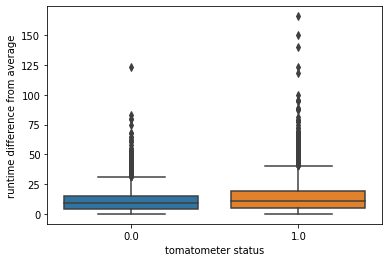

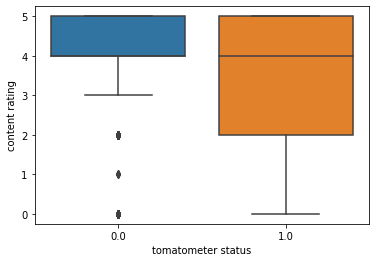

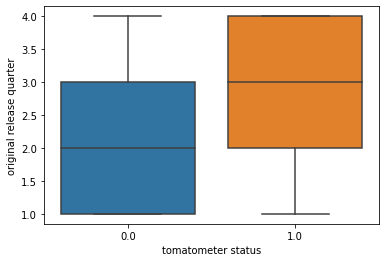

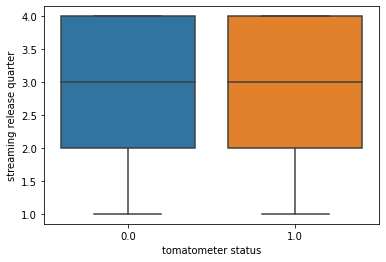

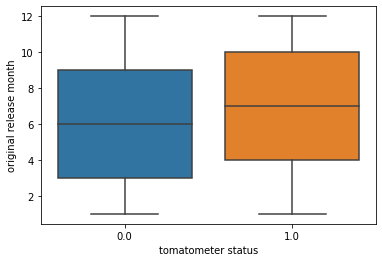

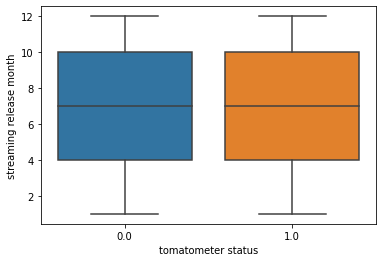

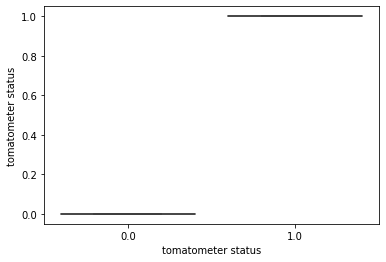

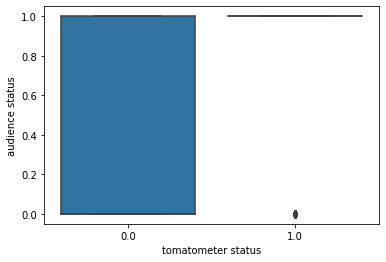

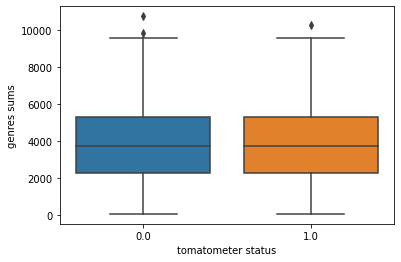

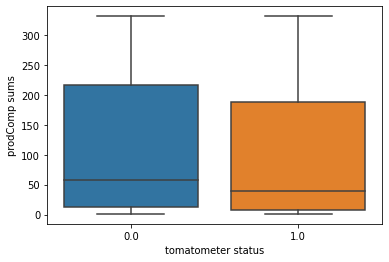

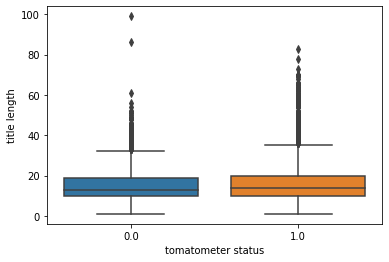

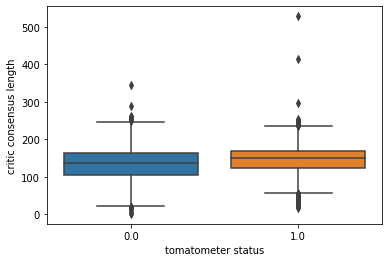

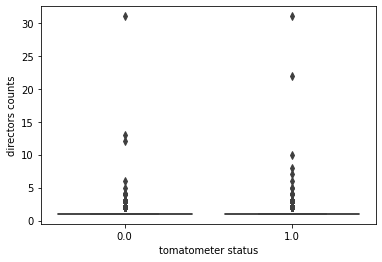

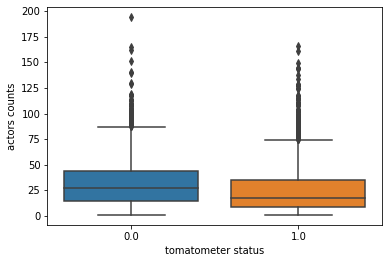

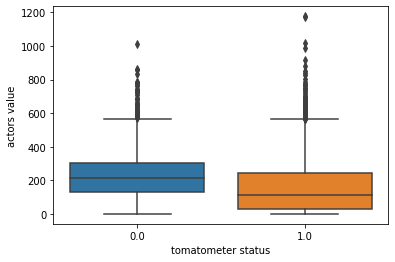

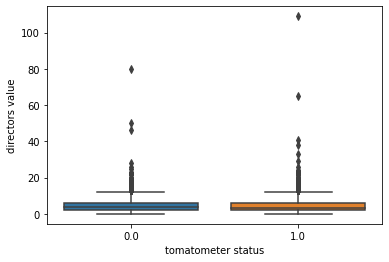

In [83]:
features_scaled=pd.DataFrame(StandardScaler().fit_transform(features))
features_scaled.columns = features.columns
features_scaled.tomatometer_status = features.tomatometer_status
for c in features.columns:
    plt.figure()
    sns.boxplot(x=features.tomatometer_status, y=features[c])
    plt.xlabel('tomatometer status')
    plt.ylabel(c.replace('_', ' '))
    plt.show()
#plt.xticks(rotation=90)